In [71]:
# python librairies installation
%pip install split-folders matplotlib opencv-python spicy

Note: you may need to restart the kernel to use updated packages.


In [72]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [73]:
datagen = ImageDataGenerator()

In [74]:
# define classes name
class_names = ['apple', 'car', 'dog', 'gold', 'mobile', 'rose', 'scooter', 'tiger', 'wallet', 'watch']

In [75]:
train_generator = datagen.flow_from_directory(
    directory="/workspace/steven/EEG2Image/data/images/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="sparse", 
)

Found 534 images belonging to 10 classes.


In [76]:
valid_generator = datagen.flow_from_directory(
    directory="/workspace/steven/EEG2Image/data/images/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode="sparse",  
)

Found 175 images belonging to 10 classes.


In [77]:
test_generator = datagen.flow_from_directory(
    directory="/workspace/steven/EEG2Image/data/images/test", 
    target_size=(224, 224),
    batch_size=32,
    class_mode="sparse",  
)

Found 175 images belonging to 10 classes.


In [78]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [79]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)

predictions = layers.Dense(len(class_names), activation='softmax')(x)  # Replace `num_classes` with your actual number of classes
model = Model(inputs = resnet_50.input, outputs = predictions)

In [80]:
# Create and configure the optimizer with a lower learning rate
optimizer = Adam(learning_rate=0.0001)

In [81]:
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [82]:
#  Now, launch the training with the configured optimizer
model_history = trainModel(model=model, epochs=10, optimizer=optimizer)

Epoch 1/10
17/17 [==============================] - 8s 275ms/step - loss: 3.6579 - accuracy: 0.0936 - val_loss: 2.1945 - val_accuracy: 0.1657
Epoch 2/10
17/17 [==============================] - 3s 202ms/step - loss: 2.9784 - accuracy: 0.1086 - val_loss: 2.1694 - val_accuracy: 0.2686
Epoch 3/10
17/17 [==============================] - 4s 207ms/step - loss: 2.5950 - accuracy: 0.1386 - val_loss: 2.1500 - val_accuracy: 0.3143
Epoch 4/10
17/17 [==============================] - 4s 205ms/step - loss: 2.4733 - accuracy: 0.1629 - val_loss: 2.1081 - val_accuracy: 0.5086
Epoch 5/10
17/17 [==============================] - 3s 193ms/step - loss: 2.4759 - accuracy: 0.1573 - val_loss: 2.0682 - val_accuracy: 0.5829
Epoch 6/10
17/17 [==============================] - 3s 198ms/step - loss: 2.3398 - accuracy: 0.1704 - val_loss: 2.0364 - val_accuracy: 0.6286
Epoch 7/10
17/17 [==============================] - 3s 191ms/step - loss: 2.3359 - accuracy: 0.1929 - val_loss: 2.0064 - val_accuracy: 0.7143
Epoch 

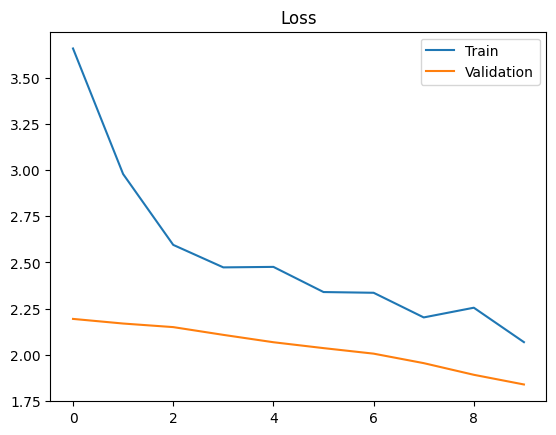

In [83]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

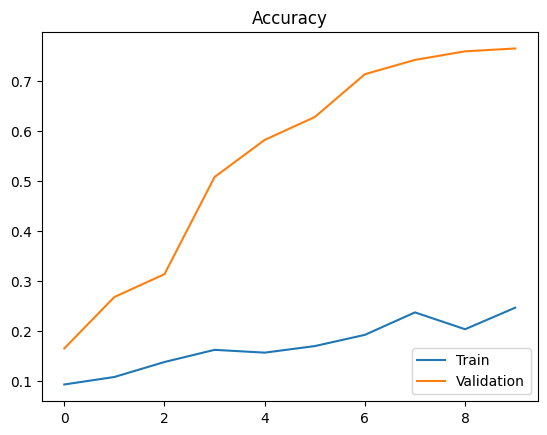

In [84]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [85]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

6/6 [==============================] - 1s 123ms/step - loss: 1.8362 - accuracy: 0.7829
The test loss is:  1.8362393379211426
The best accuracy is:  78.28571200370789


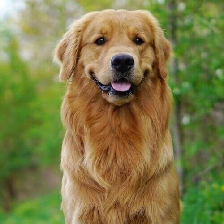

In [86]:
img = tf.keras.preprocessing.image.load_img('/workspace/steven/EEG2Image/data/images/dog.jpeg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [87]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 1s 834ms/step
[[0.09506439 0.0926652  0.12717569 0.09456401 0.10006331 0.10244508
  0.10103299 0.11434773 0.0796277  0.09301388]]


In [88]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[2]


In [89]:
# transform classes number into classes name
class_names[class_id.item()]

'dog'

In [90]:
model.save('/workspace/saved_model/my_model')

INFO:tensorflow:Assets written to: /workspace/saved_model/my_model/assets


INFO:tensorflow:Assets written to: /workspace/saved_model/my_model/assets


In [91]:
# my_model directory
%ls /workspace/saved_model/

my_model/


In [92]:
# contains an assets folder, saved_model.pb, and variables folder
%ls /workspace/saved_model/my_model

assets/  fingerprint.pb  keras_metadata.pb  saved_model.pb  variables/


In [93]:
model = tf.keras.models.load_model('/workspace/saved_model/my_model')
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

## Conclusion

**Transfer Learning** saves time by achieving better performance in fewer epochs. 

Train and test this model on your own dataset !